In [46]:
import pandas as pd
import numpy as np
import shap
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('train_features.csv')

# Ensure the dataset has a target column (rename "target_column" to the actual target name)
target_column = 'label'  # Replace with the actual target column name
if target_column not in data.columns:
    raise ValueError(f"The dataset must contain a target column named '{target_column}'.")

# Split into features and target
#X = data.drop(columns=[target_column, "190"])
x = data [["180", "181", "182", "183", "184", "185", "186", "187", "188", "189", "191", "192", "193"]]
y = data[target_column]

x.rename(columns={'193': 'tonnetz', '192': 'tempogram', '191' : 'poly', '189':'spectral_bandwidth', '188': 'spectral_flatness',
                 '187':'entropy', '186':'chroma_cens', '185':'chroma_cqt', '184':'chroma_stft', '183':'rms',
                 '182':'spectral_centroid', '181':'spectral_rolloff', '180':'zcr'}, inplace=True)

all_data = data [["180", "181", "182", "183", "184", "185", "186", "187", "188", "189", "191", "192", "193", target_column]]
all_data.rename(columns={'193': 'tonnetz', '192': 'tempogram', '191' : 'poly', '189':'spectral_bandwidth', '188': 'spectral_flatness',
                 '187':'entropy', '186':'chroma_cens', '185':'chroma_cqt', '184':'chroma_stft', '183':'rms',
                 '182':'spectral_centroid', '181':'spectral_rolloff', '180':'zcr'}, inplace=True)

print(all_data)

all_data.to_csv("feats.csv", index=False)


C:\Users\meldo\AppData\Local\Temp\ipykernel_60992\2420614707.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.rename(columns={'193': 'tonnetz', '192': 'tempogram', '191' : 'poly', '189':'spectral_bandwidth', '188': 'spectral_flatness',
C:\Users\meldo\AppData\Local\Temp\ipykernel_60992\2420614707.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.rename(columns={'193': 'tonnetz', '192': 'tempogram', '191' : 'poly', '189':'spectral_bandwidth', '188': 'spectral_flatness',


            zcr  spectral_rolloff  spectral_centroid       rms  chroma_stft  \
0      0.091316       2011.904762        1107.955214  0.176063     0.833135   
1      0.091309       1869.047619         967.835505  0.172829     0.807731   
2      0.098989       2019.841270        1085.668723  0.147945     0.799260   
3      0.178595       2960.317460        1777.212128  0.218691     0.784338   
4      0.127534       2892.857143        1466.432225  0.096554     0.803804   
...         ...               ...                ...       ...          ...   
13951  0.194251       3392.857143        1952.148440  0.103187     0.753952   
13952  0.241699       3500.000000        2198.479078  0.133111     0.721386   
13953  0.080675       2380.952381        1168.115313  0.153150     0.894441   
13954  0.171418       3297.619048        1849.459680  0.122889     0.747911   
13955  0.146740       2503.968254        1440.151872  0.122860     0.813654   

       chroma_cqt  chroma_cens      entropy  spectr

In [33]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


print (X_train)


            zcr  spectral_rolloff  spectral_centroid       rms  chroma_stft  \
6661   0.106585       2134.920635        1158.376737  0.163618     0.824794   
9611   0.051905       1682.539683         863.665329  0.166534     0.859963   
6742   0.112576       2269.841270        1204.514750  0.156743     0.837848   
4127   0.198893       2869.047619        1778.987338  0.177533     0.729137   
7145   0.130425       2519.841270        1482.335845  0.107888     0.776682   
...         ...               ...                ...       ...          ...   
5191   0.129705       2214.285714        1348.507048  0.148307     0.754753   
13418  0.095145       2035.714286        1158.402935  0.090497     0.798958   
5390   0.109437       2095.238095        1227.796604  0.145009     0.811880   
860    0.157699       2904.761905        1713.539734  0.183247     0.759913   
7270   0.185896       3337.301587        1872.457990  0.086656     0.759604   

       chroma_cqt  chroma_cens      entropy  spectr

In [34]:
# Train a Random Forest model for XAI demonstration
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [37]:
X_train.shape

(11164, 13)

In [27]:
# Feature Importance using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_test)

 99%|===================| 2774/2792 [02:14<00:00]        

ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.600200, while the model output was 0.610000. If this difference is acceptable you can set check_additivity=False to disable this check.

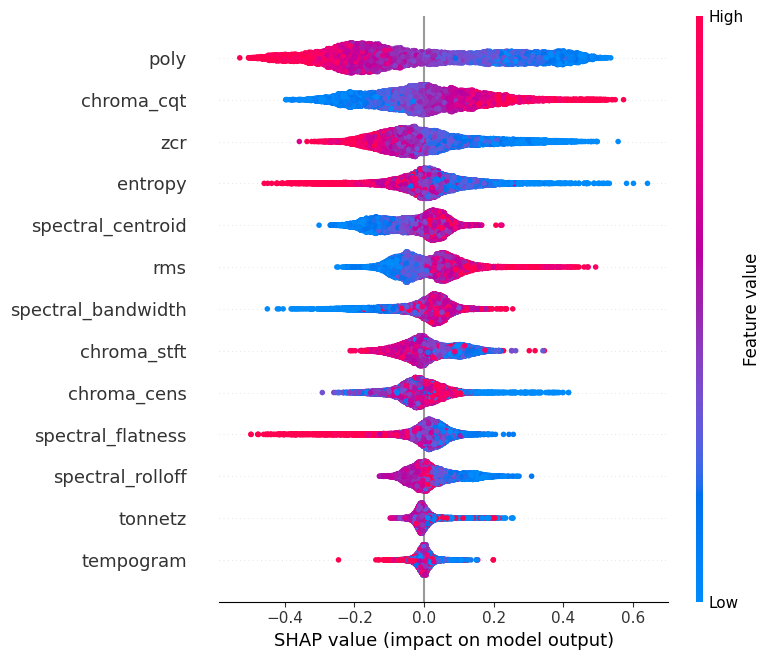

In [47]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb  # Assuming a tree-based model for SHAP analysis

# Load the CSV file
file_path = "feats.csv"
df = pd.read_csv(file_path)

# Separate features and target (last column)
X = df.iloc[:, :-1]  # All columns except the last one (features)
y = df.iloc[:, -1]  # Last column as the target

# Train a simple model (XGBoost) for SHAP importance analysis
model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
model.fit(X, y)

# Compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X)
